In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import scipy 


In [2]:
df=pd.read_csv('Yulu.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
## Knowing about the data
# datetime: datetime
# season: season (1: spring, 2: summer, 3: fall, 4: winter)
# holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
# workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
# weather:
# 1: Clear, Few clouds, partly cloudy, partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# temp: temperature in Celsius
# atemp: feeling temperature in Celsius
# humidity: humidity
# windspeed: wind speed
# casual: count of casual users
# registered: count of registered users
# count: count of total rental bikes including both casual and registered
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [6]:
# Using proper names in categorical columns rather than having numbers
df['season']=df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
df['weather']=df['weather'].map({1:'clear',2:'Mist',3:'light rain',4:'heavy rain'})


In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,clear,9.84,14.395,75,0.0,0,1,1


In [13]:
# Statistical summary of Data
df.select_dtypes('object').describe()

,datetime,season,weather
count,10886,10886,10886
unique,10886,4,4
top,2011-01-01 00:00:00,winter,clear
freq,1,2734,7192


In [14]:
df.select_dtypes('number').describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [15]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,clear,9.84,14.395,75,0.0,0,1,1


In [19]:
# Let's divide the data into seasons and find outliers of count for each season 
df_spring=df[df['season']=='spring']

In [20]:
q1=df_spring['count'].quantile(0.25)
q3=df_spring['count'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)

24.0 164.0 140.0


In [22]:
df_spring.shape

(2547, 12)

In [25]:
df_spring[(df_spring['count']<q1-((1.5)*iqr)) | (df_spring['count']>q3+((1.5)*iqr))]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [26]:
# we do not have any outliers for spring season since we did not get any data above

In [27]:
# Let's check if we have outliers for any other season 
df_summer=df[df['season']=='summer']
q1=df_summer['count'].quantile(0.25)
q3=df_summer['count'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)

49.0 321.0 272.0


In [29]:
df_summer.shape

(2733, 12)

In [30]:
#Removing outliers from df_summer
df_summer=df_summer[~((df_summer['count']<q1-((1.5)*iqr)) | (df_summer['count']>q3+((1.5)*iqr)))]

In [31]:
df_summer.shape

(2691, 12)

In [32]:
# Let's check if we have outliers for fall
df_fall=df[df['season']=='fall']
q1=df_fall['count'].quantile(0.25)
q3=df_fall['count'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)

68.0 347.0 279.0


In [33]:
df_fall.shape

(2733, 12)

In [34]:
df_fall=df_fall[~((df_fall['count']<q1-((1.5)*iqr)) | (df_fall['count']>q3+((1.5)*iqr)))]

In [35]:
df_fall.shape

(2672, 12)

In [36]:
# Similarly let's check if we have outliers for winter 
df_winter=df[df['season']=='winter']
q1=df_winter['count'].quantile(0.25)
q3=df_winter['count'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)

51.0 294.0 243.0


In [37]:
df_winter.shape

(2734, 12)

In [38]:
df_winter=df_winter[~((df_winter['count']<q1-((1.5)*iqr)) | (df_winter['count']>q3+((1.5)*iqr)))]

In [39]:
df_winter.shape

(2670, 12)

In [41]:
# Now that we have removed all the outliers wrt to season let's concat all the dfs

df_final = pd.concat([df_spring,df_summer,df_fall,df_winter],ignore_index=True)

In [42]:
df_final

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,clear,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,0,0,clear,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,0,0,clear,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,0,0,clear,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,0,0,clear,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10575,2012-12-19 19:00:00,winter,0,1,clear,15.58,19.695,50,26.0027,7,329,336
10576,2012-12-19 20:00:00,winter,0,1,clear,14.76,17.425,57,15.0013,10,231,241
10577,2012-12-19 21:00:00,winter,0,1,clear,13.94,15.910,61,15.0013,4,164,168
10578,2012-12-19 22:00:00,winter,0,1,clear,13.94,17.425,61,6.0032,12,117,129


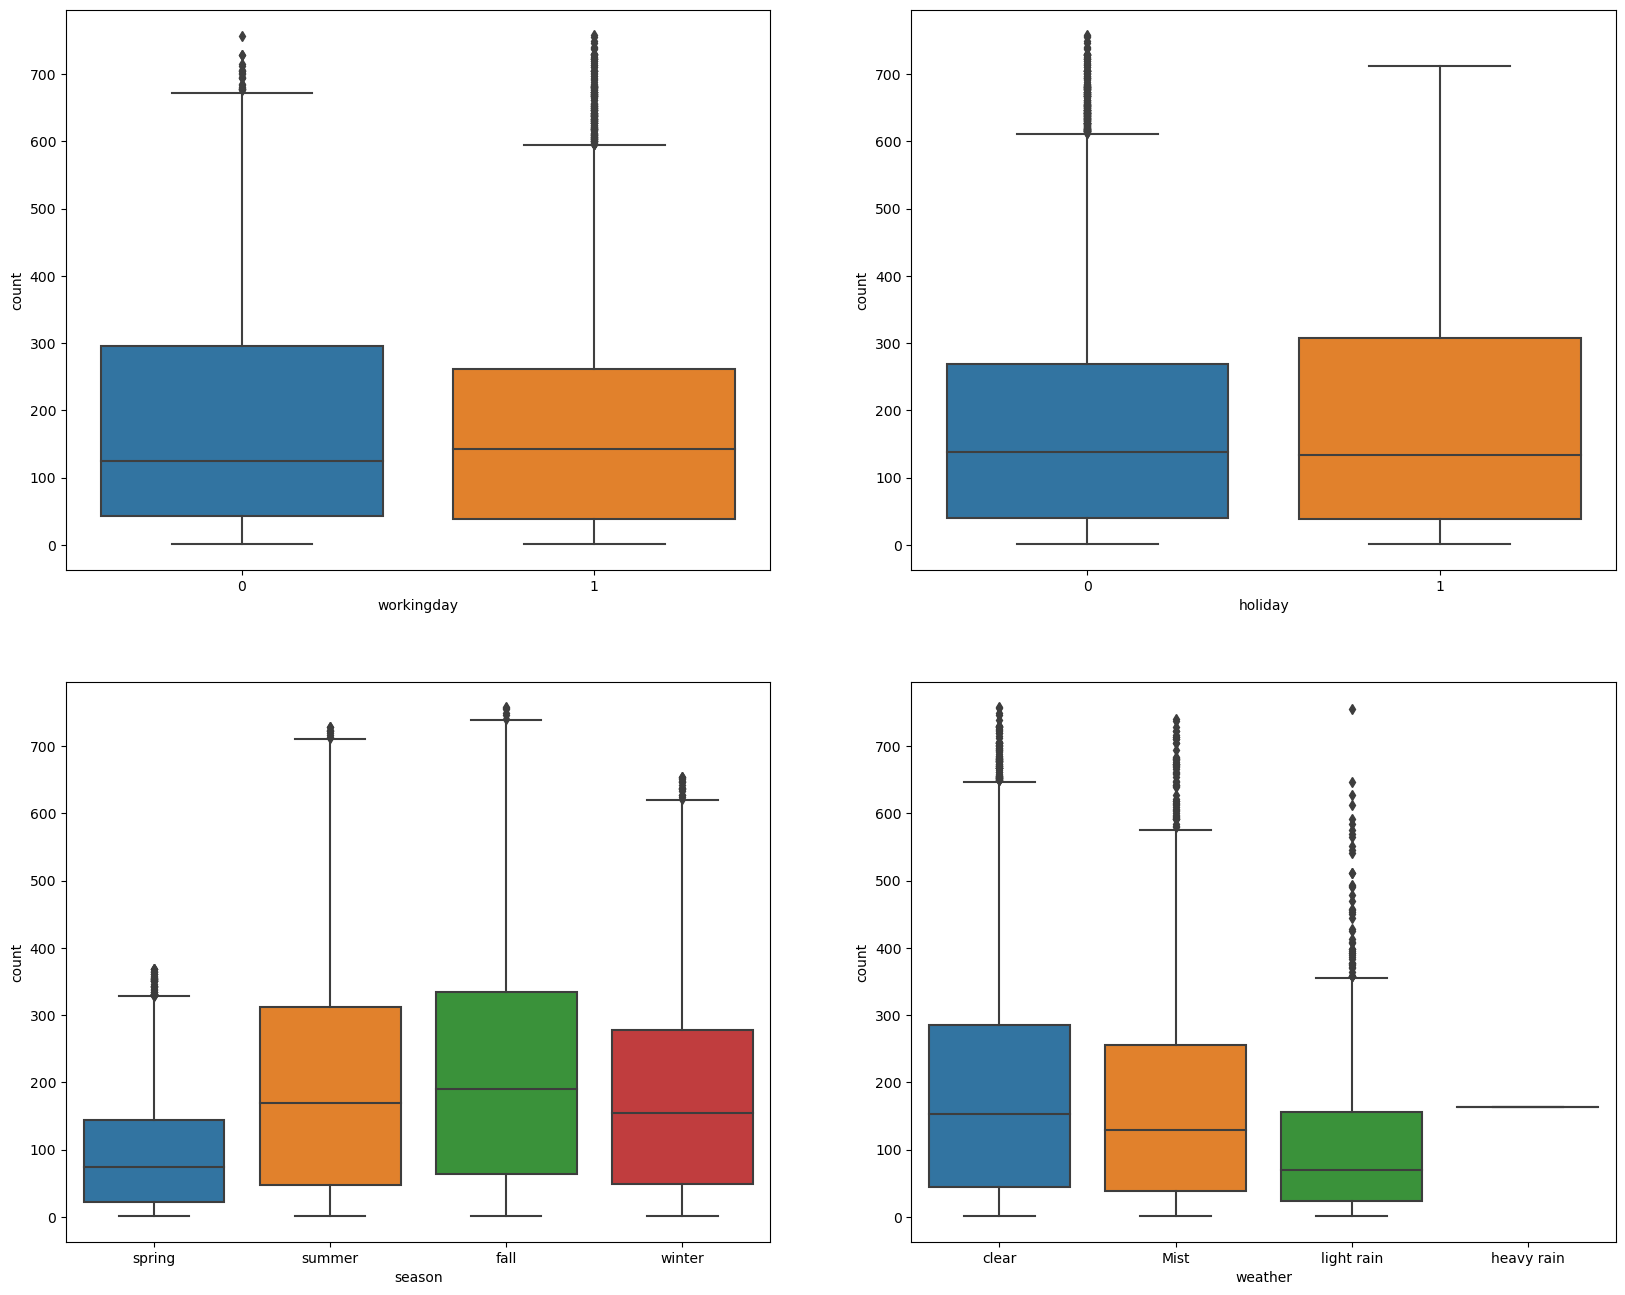

In [44]:
# Let's check how the count varies with working day, holiday, season, weather

fig,axes=plt.subplots(2,2,figsize=(20,16))
sns.boxplot(data=df_final,x='workingday',y='count',ax=axes[0,0])
sns.boxplot(data=df_final,x='holiday',y='count',ax=axes[0,1])
sns.boxplot(data=df_final,x='season',y='count',ax=axes[1,0])
sns.boxplot(data=df_final,x='weather',y='count',ax=axes[1,1])
plt.show()

In [45]:
# Inferences from the above boxplots are
# 1) The count of cycles seems to be more when there is clear weather
# 2) The count of cycles seems to be more in summer and fall seasons compared to spring
# 3) The count of medians of count of cycles on working days and holidays seems comparable 

In [46]:
# Let's separate hours into a separate column 
df_final['datetime']=pd.to_datetime(df_final['datetime'])
df_final['hour']=df_final['datetime'].dt.hour

In [47]:
df_final.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,spring,0,0,clear,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,spring,0,0,clear,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,spring,0,0,clear,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,spring,0,0,clear,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,spring,0,0,clear,9.84,14.395,75,0.0,0,1,1,4


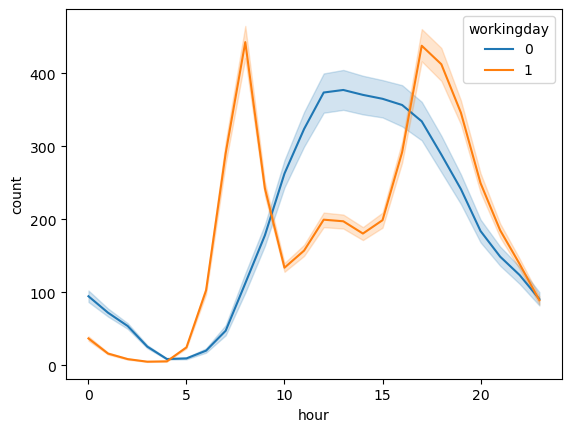

In [53]:
# Let's check the peakhours for Yulu 
sns.lineplot(data=df_final,x='hour',y='count',hue='workingday')
plt.show()

In [55]:
# Inferences from above plot
# 1) The peak hours for Yulu on working days is around start of working hours i.e around 8:30 am to 9 am and evening during 
# 5:30 pm to 6 pm 
# 2) The peak hours for non working days is around 11 am, probably i.e when people go out for small errands

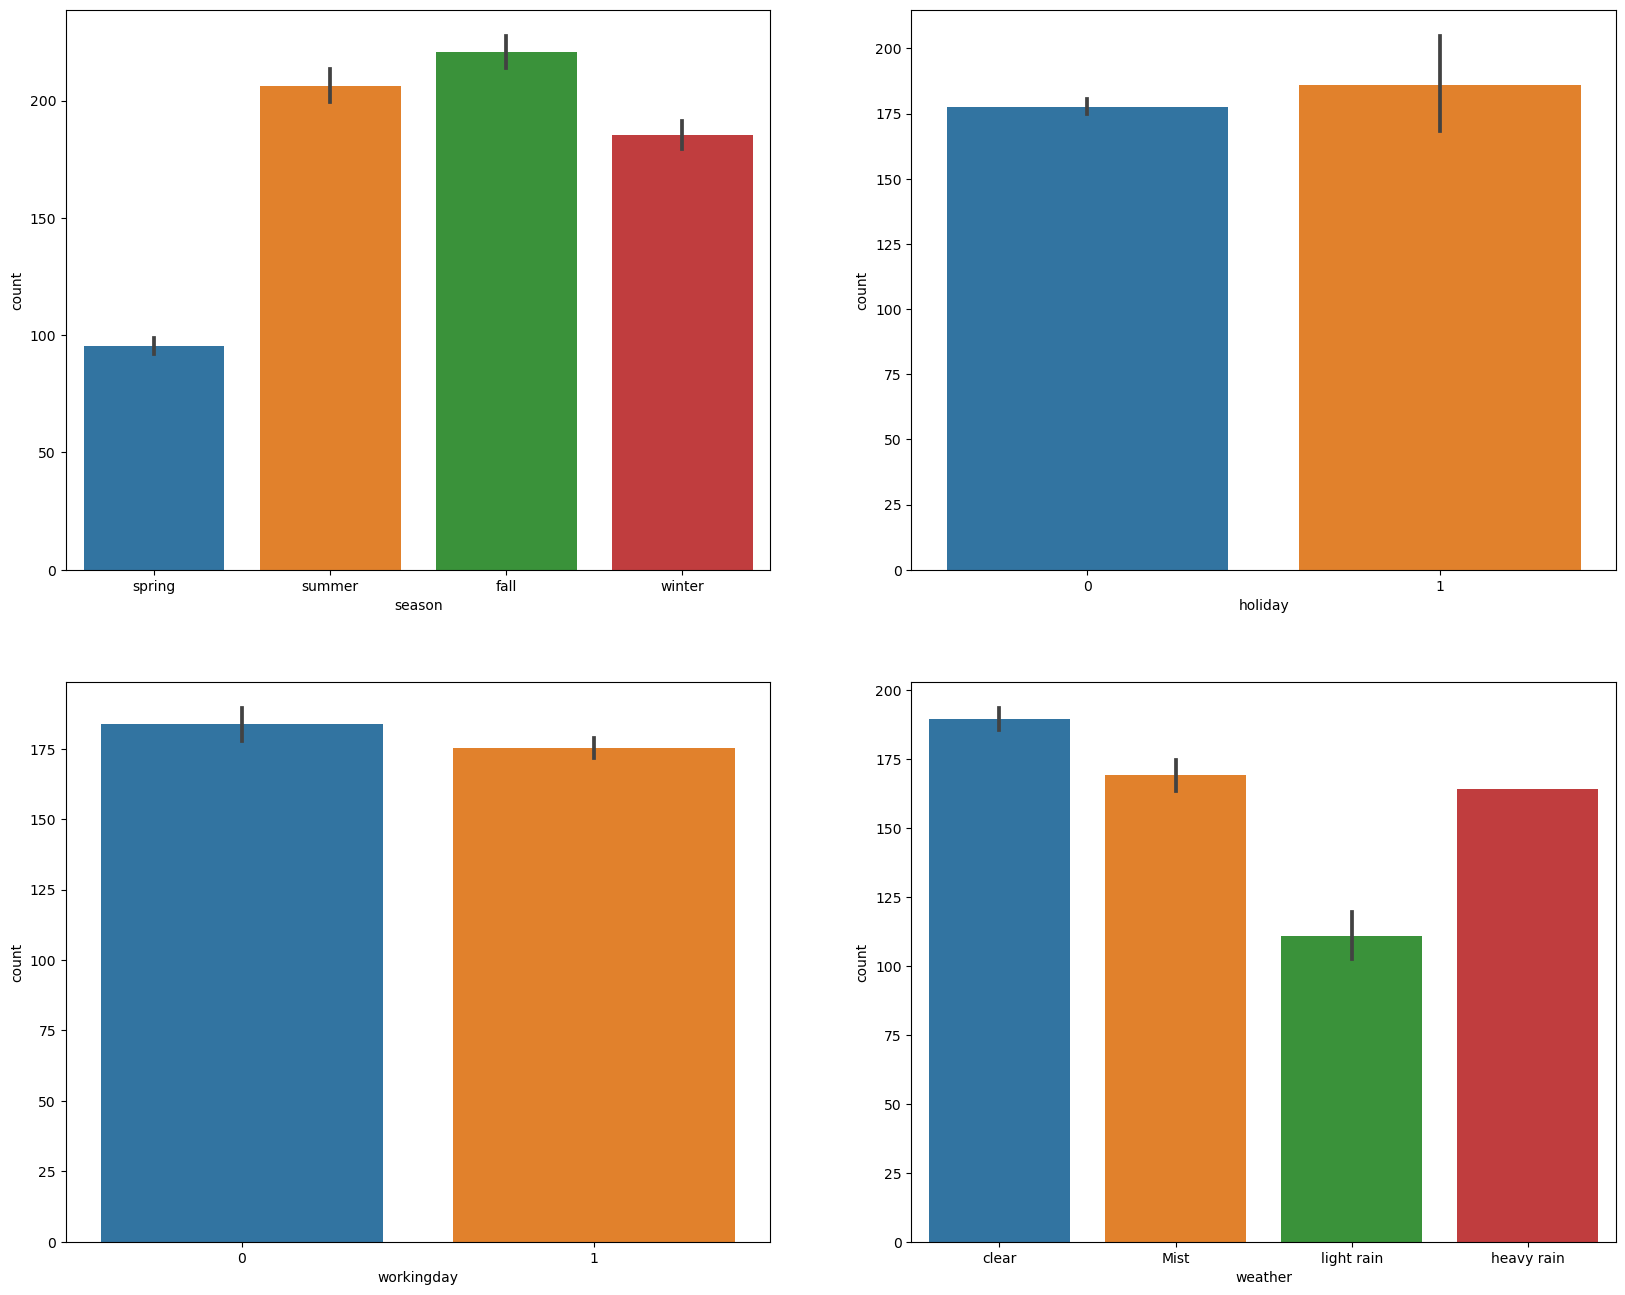

In [64]:
# Let's check the barlots for differet categorical data
fig,axes=plt.subplots(2,2,figsize=(20,16))
sns.barplot(data=df_final,x='season',y='count',ax=axes[0,0])
sns.barplot(data=df_final,x='holiday',y='count',ax=axes[0,1])
sns.barplot(data=df_final,x='workingday',y='count',ax=axes[1,0])
sns.barplot(data=df_final,x='weather',y='count',ax=axes[1,1])
plt.show()

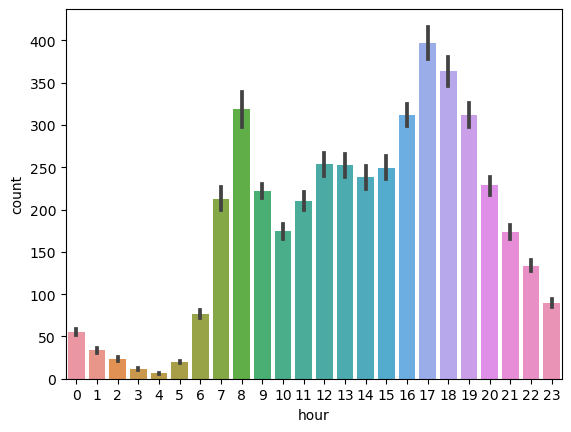

In [65]:
sns.barplot(data=df_final,x='hour',y='count')
plt.show()

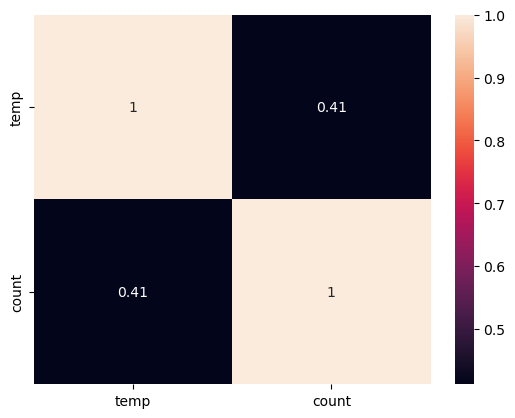

In [70]:
# Let's now do some analysis on numerical columns
df_final.head()
# Let's find relation between temperature/count and also atemp and count 

heatmap_matrix=df_final[['temp','count']].corr()
sns.heatmap(heatmap_matrix,annot=True)
plt.show()

In [71]:
# We can see slightly positive correlation of temperature and count

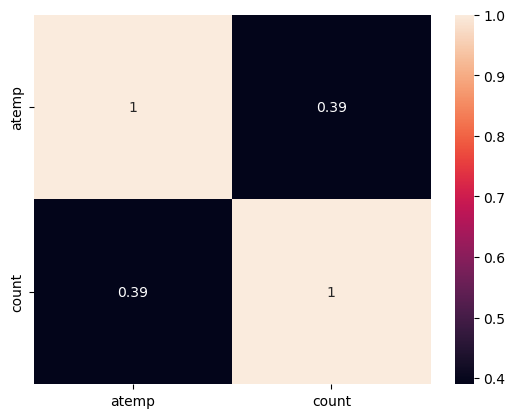

In [73]:
heatmap_matrix =df[['atemp','count']].corr()
sns.heatmap(heatmap_matrix,annot=True)
plt.show()

In [74]:
df_final.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,spring,0,0,clear,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,spring,0,0,clear,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,spring,0,0,clear,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,spring,0,0,clear,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,spring,0,0,clear,9.84,14.395,75,0.0,0,1,1,4


In [75]:
# Let's dive deep to check whether there is significant diffenece in the count of cycles on working days

In [76]:
# As seen in the above barplots and boxplots count of cycles is comparable on working days and holidays

In [85]:
# Let's peroform hypothesis testing to know the same 

# H0 : The count of cycles on a working day <= the count of cycles on non- working day
# Ha : The count of cycles on working day  > the count cycles on non-working day 

# let's say the significance level is 5% 

alpha=0.05

df_final['workingday'].value_counts()

workingday
1    7154
0    3426
Name: count, dtype: int64

In [86]:
# Since there are less number of non working days in the data, it is advisable to take same number of working days to compare 
# This is being done to decrease the biasness as there will be less variance in a bigger sample

In [87]:
df_work=df_final[df_final['workingday']==1]['count'].sample(3426)
df_nowork=df_final[df_final['workingday']==0]['count'].sample(3426)

In [88]:
# Let's apply ttest_independent on this as we have only 2 different categories vs 1 numerical variable 
# Let's check the variances of df_work and df_nowork 
df_final.groupby('workingday')['count'].std()


workingday
0    169.549987
1    158.474373
Name: count, dtype: float64

In [89]:
# As we can see above the std dev is different for both which indicates diffenece in variances

In [90]:
t_stat,p_val=scipy.stats.ttest_ind(df_work,df_nowork,equal_var=False,alternative='greater')

print(p_val)

if p_val<alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")


0.9790417930266817
Accept the null hypothesis


In [91]:
# Since p_val is greater than alpha we can easily say that we have to accept null hypothesis which implies
# count of cycles on working day is less than non working days

In [94]:
# Let's now check if there is impact of seasons on count of cycles 
df_final.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2672.0,220.631737,176.588088,1.0,64.0,189.5,334.0,758.0
spring,2547.0,95.441696,87.007314,1.0,22.0,74.0,144.5,369.0
summer,2691.0,206.194352,179.091965,1.0,47.0,169.0,312.5,729.0
winter,2670.0,185.453558,155.963861,1.0,49.0,154.0,278.0,654.0


In [95]:
# Just by seeing the summary table we can say that there is a differnece in mean count
# of cycles for spring which is lower, we will still apply analysis and check

In [96]:
# Since there are more than 2 categories of seasons, it's better for us to go with Anova test

In [97]:
df_final['season'].value_counts()

season
summer    2691
fall      2672
winter    2670
spring    2547
Name: count, dtype: int64

In [98]:
# We have almost equal data for all types of seasons
df_s=df_final[df_final['season']=='summer']['count']
df_f=df_final[df_final['season']=='fall']['count']
df_w=df_final[df_final['season']=='winter']['count']
df_sp=df_final[df_final['season']=='spring']['count']

# Assumptions to apply anova test are as follows:
# 1) The data should be normal
# 2) There should be equal variances between the groups 
# 3) Data should be random and independent

# Let's check if the data is normal:

# H0: Data is normally distributed 
# HA: Data is not normally distributed
    
stats,p_vals=scipy.stats.shapiro(df_s)
statf,p_valf=scipy.stats.shapiro(df_f)
statw,p_valw=scipy.stats.shapiro(df_w)
statsp,p_valsp=scipy.stats.shapiro(df_sp)

print(f"summer data: {(stats,p_vals)}, Fall data: {(statf,p_valf)}, Winter data: {(statw,p_valw)}, Spring data: {(statsp,p_valsp)}")


summer data: (0.9085634350776672, 1.7675445214538028e-37), Fall data: (0.9323176145553589, 3.3501787363106895e-33), Winter data: (0.9180989265441895, 8.392706088240139e-36), Spring data: (0.8928084969520569, 6.46495072099651e-39)


In [99]:
# As you can see the above data, all the p_vals are very low which implies none of the data is normally distributed

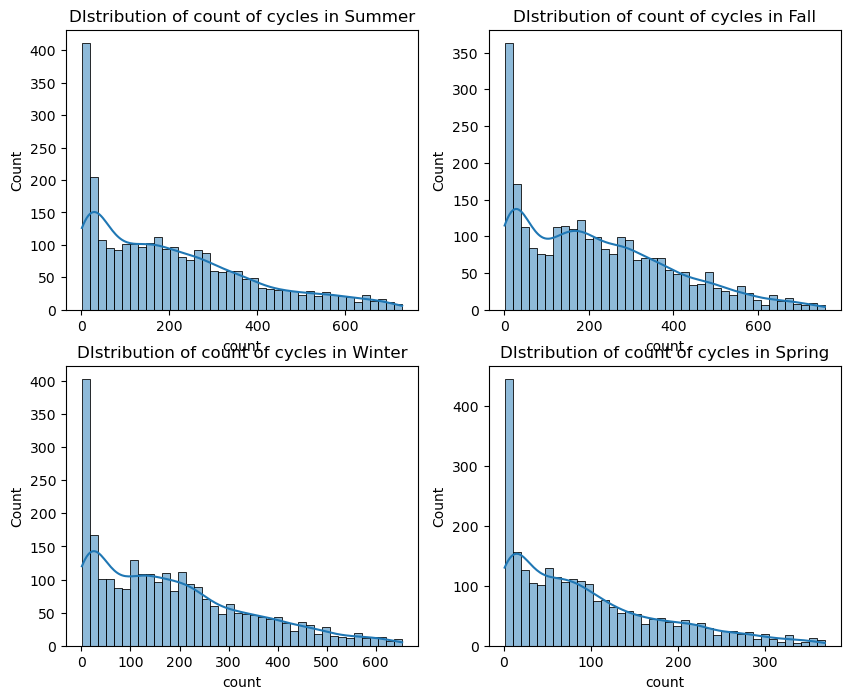

In [104]:
# We can plot a histplot and check, whether visually the data is normal or not

fig,axes=plt.subplots(2,2,figsize=(10,8))
sns.histplot(df_s,kde=True,bins=40,ax=axes[0,0])
sns.histplot(df_f,kde=True,bins=40,ax=axes[0,1])
sns.histplot(df_w,kde=True,bins=40,ax=axes[1,0])
sns.histplot(df_sp,kde=True,bins=40,ax=axes[1,1])
axes[0,0].set_title("DIstribution of count of cycles in Summer")
axes[0,1].set_title("DIstribution of count of cycles in Fall")
axes[1,0].set_title("DIstribution of count of cycles in Winter")
axes[1,1].set_title("DIstribution of count of cycles in Spring")
plt.show()

In [105]:
# None of the data is normally distributed so first assumption of normality does not hold true

In [108]:
# Now let's check whether variances are equal among different seasons

# H0: Equal variances among different seasons
# HA: Variances are not equal

l_test,pval=scipy.stats.levene(df_s,df_f,df_w,df_sp)
print(pval)

if pval<0.5:
    print('Variances are not equal')
else:
    print("Variances are equal among different seasons")

6.36911684683247e-215
Variances are not equal


In [111]:
# The second assumption of Anova also failed 
# Therefore we can apply kruskal wallis test instead of Anova 

k_test,p_val=scipy.stats.kruskal(df_s,df_f,df_w,df_sp)

print(p_val)
if p_val<0.05:
    print('Season does impact the count of cycles used')
else:
    print('Season does not impact the count of cycles used')

1.1661380939057576e-188
Season does impact the count of cycles used


In [112]:
# Let's do the similar analysis on whether weather has an impact on the cycles rented 
df_final['weather'].value_counts()

weather
clear         6957
Mist          2776
light rain     846
heavy rain       1
Name: count, dtype: int64

In [116]:
# We have only 1 record of heavy rain so we cannot conclude anything with that data so I am just discarding that
df_final=df_final[df_final['weather']!='heavy rain']

In [117]:
df_final['weather'].value_counts()

weather
clear         6957
Mist          2776
light rain     846
Name: count, dtype: int64

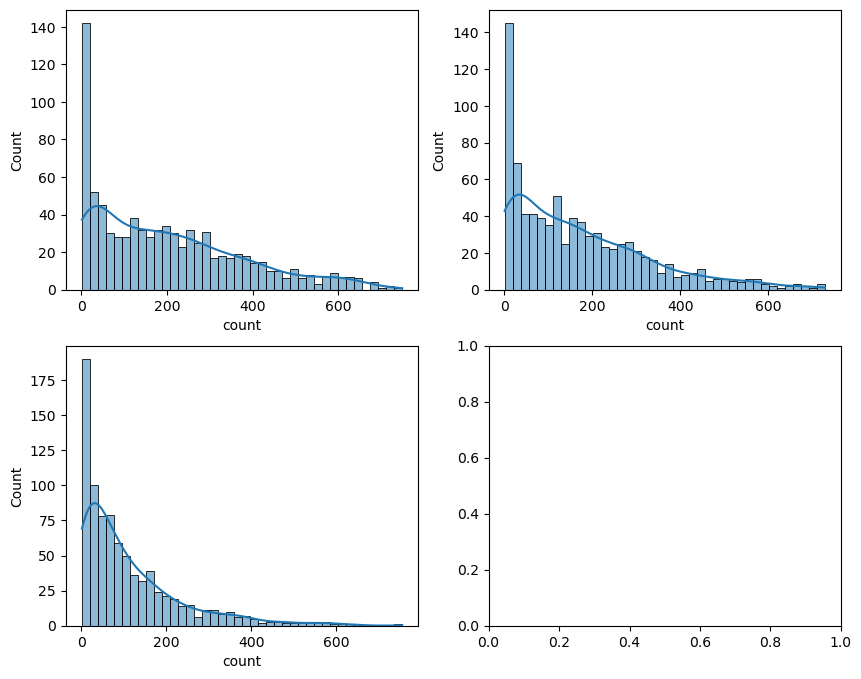

Clear weather: 1.2735375502597808e-21, Misty weather: 4.111126519453957e-24, Rainy weather: 1.233897518108994e-30
Data is not normally distributed
Pval for Levene's test= 1.667663875169262e-28
Variances are not equal


In [123]:
# Similar to the seasons analysis let's check the weathers with Anova 

# Assumptions to apply anova test are as follows:
# 1) The data should be normal
# 2) There should be equal variances between the groups 
# 3) Data should be random and independent

# Let's check if the data is normal:

# H0: Data is normally distributed 
# HA: Data is not normally distributed

df_c=df_final[df_final['weather']=='clear']['count'].sample(846)
df_m=df_final[df_final['weather']=='Mist']['count'].sample(846)
df_r=df_final[df_final['weather']=='light rain']['count'].sample(846)

fig,axes=plt.subplots(2,2,figsize=(10,8))
sns.histplot(df_c,kde=True,bins=40,ax=axes[0,0])
sns.histplot(df_m,kde=True,bins=40,ax=axes[0,1])
sns.histplot(df_r,kde=True,bins=40,ax=axes[1,0])
plt.show()

s1,p1=scipy.stats.shapiro(df_c)
s2,p2=scipy.stats.shapiro(df_m)
s3,p3=scipy.stats.shapiro(df_r)

print(f"Clear weather: {p1}, Misty weather: {p2}, Rainy weather: {p3}" )
      
if p1<0.05:
      print("Data is not normally distributed")
else:
      print("Data is normally distributed")

# H0 : Variances of count among different weathers is equal
# HA : Variances of count among different weathers is different 
    
# Let's check variances using levene's test 

l,pval_levene=scipy.stats.levene(df_c,df_m,df_r)

print(f"Pval for Levene's test= {pval_levene}")

if pval_levene<0.05:
      print("Variances are not equal")
else:
      print("Variances are equal")


In [124]:
# Inference is that assumptions are not holding for Anova for testing weather impact on count
# Hence performing kruskal wallis test

stat1,p_val_kruskal=scipy.stats.kruskal(df_c,df_m,df_r)
print(p_val_kruskal)
if p_val_kruskal<0.05:
    print('There is an impact of weather on count of cycles')
else:
    print('There is no impact of weather on count of cycles')

2.7410756166358054e-30
There is an impact of weather on count of cycles


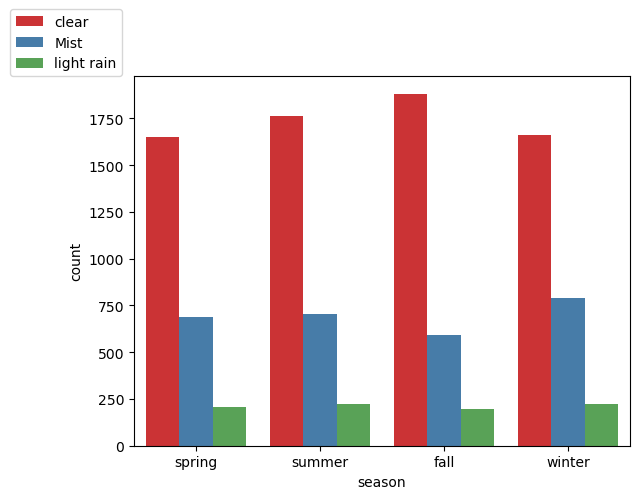

In [132]:
# Let's now check whether season impacts weather. (Both weather and season are categorical variables)

sns.countplot(x='season',hue='weather',data=df_final,palette='Set1')
plt.legend(loc=(-0.25,1))
plt.show()



In [137]:
# As you can see the above count plot there doesn't seem to look much of a difference so we have to test
# whether there is an impact of season on weather, this can be done using chisquare test as it is used for two categorical 
# type of variables

# H0 : There is no impact of season on weather
# HA : There is an impact of season on weather

crosstab=pd.crosstab(df_final['season'],df_final['weather'])
crosstab

weather,Mist,clear,light rain
season,,,
fall,594,1882,196
spring,689,1651,206
summer,705,1763,223
winter,788,1661,221


In [139]:
cstat,pvalue,dof,expected_freq=scipy.stats.chi2_contingency(crosstab)
print(pvalue)

if pvalue<0.05:
    print("There is an impact of season on weather")
else:
    print("There is no impact of season on weather")
    


6.429886183354367e-08
There is an impact of season on weather


In [ ]:
# As we can see the pvalue is way below 0.05 we can reject the null hypothesis and hence safely say
# There is an impact of season on weather.